# 2.1 Least Squares Fitting


#### Dependencies:

In [72]:
import numpy as np
import matplotlib.pyplot as plt


#### 2. Write code to fit a polynomial of degree P to 1D data variables x and y. ...

In [73]:
def poly_fit(x, y, p):
    """
    Fits a polynomial of a choosable degree to 1D input and target data.
    
    Parameteters:
        x - 1D numpy array, input data
        y - 1D numpy array (same length as x), target data
        p - Integer, degree of polynomial
    
    Returns:
        - 1D numpy array of length p+1, polynomial components
    """
    
    X = np.zeros([len(x), p+1])

    for row in range(0, X.shape[0]):
        for col in range(0, X.shape[1]):
            X[row, col] = x[row] ** col
    
    return np.matmul (np.matmul( np.linalg.inv( np.matmul(np.transpose(X), X) ), np.transpose(X) ), y).squeeze()


def poly(a, x):
    """
    Calculates value of polynomial with given components and a given x.
    
    Parameteters:
        x - value, x-value
        a - array, components of polynomial
    
    Returns:
        - value
    """
        
    res = 0
    for p in range(0, len(a)):
        res += a[p] * x**p
        
    return res


def poly_vector(a, x_):
    """
    Calculates poly (see function) for every value x in an array.
    
    Parameteters:
        x - array, x-values
        a - array, components of polynomial
    
    Returns:
        - array (same length as x), values 
    """
        
    y_ = np.zeros([len(x_)])
    for i in range(0, len(x_)):
        y_[i] = poly(a, x_[i])
        
    return y_


def SSE(y, y_):
    """
    Calculates Sum of Squared Errors given two vectors.
    
    Parameteters:
        y - numpy array, first vector
        y_ - numpy array, second vector
        
    Returns:
        - value, sse 
    """
        
    if len(y.shape)>1:
        y = np.squeeze(y)

    return np.linalg.norm(y-y_, ord=2)**2

#### 3. Load the data in files ‘data1_x.npy’ and ‘data1_y.npy’ and use your code to fit a straight line to variables y and x. ...
##### (a) Plot the fit on the same graph as the training data. Comment.
##### (b) Indicate the coefficients and the Sum of squared errors (SSE) you obtained.

SSE: 0.7433354116956699
Coefficients: [0.63512224 1.7332128 ] 



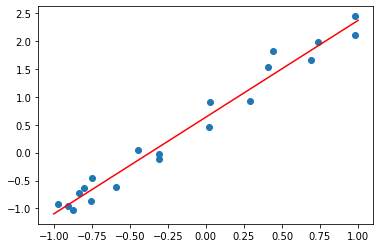

In [74]:
x = np.load('./data1_x.npy')
y = np.load('./data1_y.npy')

# A straight line means a polynomial of degree 1
a = poly_fit(x,y,1)
print("SSE:", SSE(y, poly_vector(a, x)))
print("Coefficients:", a, "\n")

x_ = np.linspace(-1, 1, 100)
y_ = poly_vector(a, x_)

plt.scatter(x,y)
plt.plot(x_,y_, color="red")
plt.show()

####  4. Load the data in files ‘data2_x.npy’ and ‘data2_y.npy’, ... , Use your code to fit a second-degree polynomial to these data.
##### (a) Plot the training data and the fit. Comment.
##### (b) Indicate the coefficients and the SSE you obtained. Comment.

SSE: 1.341593715369225
Coefficients: [ 0.97571963 -0.02571951 -1.53223529]


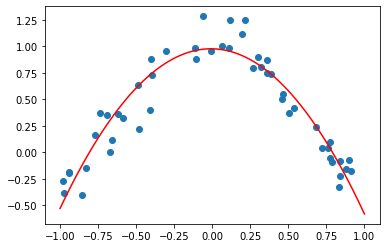

In [75]:
x = np.load('./data2_x.npy')
y = np.load('./data2_y.npy')

a = poly_fit(x,y,2)
print("SSE:", SSE(y, poly_vector(a, x)))
print("Coefficients:", a)

x_ = np.linspace(-1, 1, 100)
y_ = poly_vector(a, x_)

plt.scatter(x,y)
plt.plot(x_,y_, color="red")
plt.show()

#### 5. Repeat item 4 using as input the data from files ‘data2a_x.npy’ and ‘data2a_y.npy’. ...

##### (a) Plot the training data and the fit. Comment.
##### (b) Indicate the coefficients and the SSE you obtained. Compute, in addition, the SSE only on the inliers. Comment on the sensitivity of LS to outliers.

With outliers
SSE: 9.8901068486172
Coefficients: [ 1.08683863  0.05615907 -1.60379935]


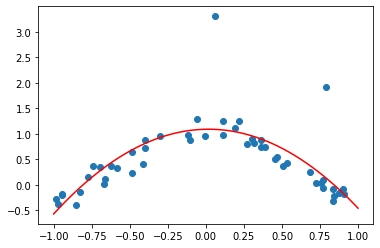

outlier indices: [20 36] 

Without outliers
SSE: 1.3311375686029299
Coefficients: [ 0.97342723 -0.02146458 -1.52321923]


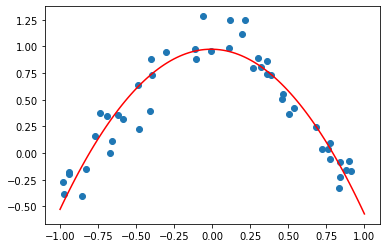

In [76]:
x = np.load('./data2a_x.npy')
y = np.load('./data2a_y.npy')

a = poly_fit(x,y,2)
print("With outliers")
print("SSE:", SSE(y, poly_vector(a, x)))
print("Coefficients:", a)

x_ = np.linspace(-1, 1, 100)
y_ = poly_vector(a, x_)

plt.scatter(x,y)
plt.plot(x_,y_, color="red")
plt.show()

# To find the outliers we apply a threshold on the squared errors and remove them from the data
squared_errors = (y-poly_vector(a, x))**2
outliers = np.where(squared_errors>1)[0]
x = np.delete(x, outliers)
y = np.delete(y, outliers)
print("outlier indices:", outliers, "\n")

# We fit a new model to the data without the outliers, and plot the raw data and the fit again
a = poly_fit(x,y,2)
print("Without outliers")
print("SSE:", SSE(y, poly_vector(a, x)))
print("Coefficients:", a)

x_ = np.linspace(-1, 1, 100)
y_ = poly_vector(a, x_)

plt.scatter(x,y)
plt.plot(x_,y_, color="red")
plt.show()